<a href="https://colab.research.google.com/github/jeong-jinuk/kisti_study/blob/master/%E1%84%80%E1%85%B5%E1%84%8B%E1%85%A9%E1%86%AB%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv

In [0]:
# colab - google drive mount
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [0]:
!ls

gdrive	sample_data


In [0]:
%cd "/content/gdrive/My Drive/kisti_colab/모두의 데이터분석 with python"
!ls -al

/content/gdrive/My Drive/kisti_colab/모두의 데이터분석 with python
total 1175
-rw------- 1 root root   17696 Dec 11 04:52 기온데이터.ipynb
-rw------- 1 root root 1185149 Dec 11 02:19 seoul.csv


In [0]:
f = open('seoul.csv','r',encoding='cp949') # 파일 열기
data = csv.reader(f)                                  # data 에 읽어온 내용 저장
data_list = []                                              # list  형태로 저장하기 위한 변수
print(data)                                                 # data 변수의 위치

In [0]:
for r in data:
    data_list.append(r)                                  # data를 한 행씩 읽어와서 data_list 에 list 형태로 저장

In [0]:
header = data_list[0]             # header 부분만 떼어 저장
data_list = data_list[1:]           # 헤더를 제외한 부분은 다시 리스트에 저장
print(header)

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']


In [0]:
print(data_list[0])

['1907-10-01', '108', '13.5', '7.9', '20.7']


# 최고기온을 알아보자

In [0]:
for row in data_list:
    if row[-1] == '':                                   # 누락된 값으로 인해 형변환이 안되므로 누락값을 설정
        row[-1] = -999
    row[-1] = float(row[-1])                     # 최고기온을 비교하기 위해 float 타입으로 변환

In [0]:
max_tamp = - 30                                   # 최고온도를 저장하기 위한 변수
max_date = ' '                                         # 최고온도가 나타난 날짜를 저장하기 위한 변수

for x in data_list:
    if x[-1] > max_tamp:
        max_date = x[0]
        max_tamp = x[-1]

print(max_date,'       ',max_tamp)

2018-08-01         39.6


In [0]:
import matplotlib.pyplot as plt

In [0]:
max_t = []
min_t = []
mean_t = []

In [0]:
for row in data:
  if row[0] != '날짜':
    if row[-1] != '' and row[-2] != '':
      date = row[0].split('-')
      if 1980 <= int(date[0]):
        if date[1] == '12' and date[2] == '29':
          max_t.append(float(row[-1]))
          min_t.append(float(row[-2]))
          mean_t.append(float(row[-3]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local

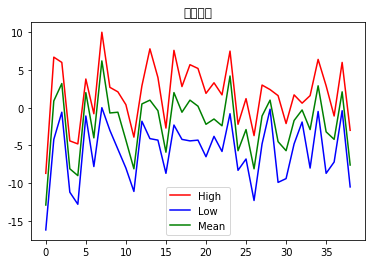

In [0]:
plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('생일기온')
plt.plot(max_t,'R',label = 'High')
plt.plot(min_t,'B',label='Low')
plt.plot(mean_t,'G',label='Mean')
plt.legend()
plt.show()

In [0]:
f.close()